## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys


from sklearn.preprocessing import StandardScaler


Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


## Be sure to used Tensorflow 2.0

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [4]:
from sklearn.model_selection import train_test_split

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1)

print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


## Plot one of the data

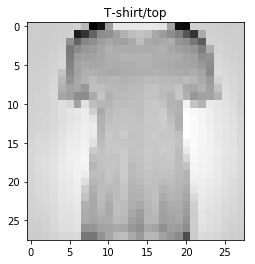

In [5]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(images[10].reshape(28, 28), cmap="binary")
#plt.title(targets_names[targets[10]])
plt.title(targets_names[targets[10]])
plt.show()

In [6]:
#print("First line of one image", images[11][0])
print("First line of one image", images[11])
print("Associated target", targets[11])

First line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

# Create the model
![](images/simple_nn.png)

# Add the layers

In [14]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.0341453  0.24935034 0.1175987  0.09800375 0.07480182 0.11600167
  0.08197575 0.03959921 0.01715009 0.1713734 ]] [9]


## Model Summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [15]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [16]:
history = model.fit(images_train, targets_train, epochs=50, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400==============================] - 1s 85us/sample - loss: 1.8366 - acc: 0.3887 - val_loss: 1.3943 - val_acc: 0.5612
Epoch 2/50
6400/6400==============================] - 0s 70us/sample - loss: 1.1900 - acc: 0.6298 - val_loss: 1.0781 - val_acc: 0.6669
Epoch 3/50
6400/6400==============================] - 0s 70us/sample - loss: 0.9657 - acc: 0.6958 - val_loss: 0.9326 - val_acc: 0.6956
Epoch 4/50
6400/6400==============================] - 0s 69us/sample - loss: 0.8502 - acc: 0.7239 - val_loss: 0.8487 - val_acc: 0.7231
Epoch 5/50
6400/6400==============================] - 0s 70us/sample - loss: 0.7782 - acc: 0.7444 - val_loss: 0.7924 - val_acc: 0.7425
Epoch 6/50
6400/6400==============================] - 0s 71us/sample - loss: 0.7273 - acc: 0.7586 - val_loss: 0.7516 - val_acc: 0.7544
Epoch 7/50
6400/6400==============================] - 1s 84us/sample - loss: 0.6888 - acc: 0.7711 - val_loss: 0.7189 - val_acc: 0.7625
Epoch 8

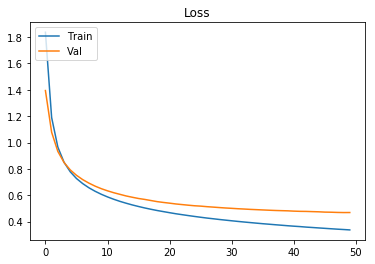

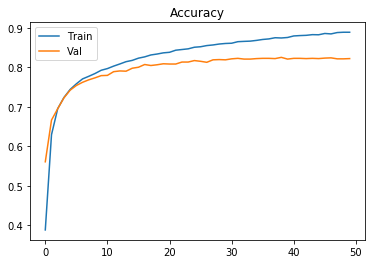

In [17]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [17]:
#model.evaluate(images_test, targets_test)